In [1]:

!pip install -q keras-nlp --upgrade
!pip install seaborn
!pip install pandas
!pip install matplotlib
!pip install tenserflow
!pip install seaborn
!pip install os
!pip install pyarrow

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [3]:
!pip install  transformers==3.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.0/769.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 49.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      /tmp/pip-build-env-4h6lus95/overlay/lib/python3.10/site-packages/setuptools/dist.py:314: InformationOnly: Normalizing '0.8.1.rc1' to '0.8.1rc1'
        self.metadata.version = self._normalize_version(self.metadata.version)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating build/lib.linux-x86_64-cpython-310/tokenizers

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras_nlp
import seaborn as sns
import os
import regex as re
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

2024-02-23 12:28:47.463410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 12:28:47.463528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 12:28:47.577868: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using TensorFlow backend
TensorFlow version: 2.15.0
KerasNLP version: 0.8.1


In [5]:
train_nlp = pd.read_csv(r'/kaggle/input/contradictory-my-dear-watson/train.csv')
test_nlp = pd.read_csv(r'/kaggle/input/contradictory-my-dear-watson/test.csv')

In [6]:
train_nlp.head(5)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [7]:
train_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


In [8]:
test_nlp.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [9]:
test_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5195 non-null   object
 1   premise     5195 non-null   object
 2   hypothesis  5195 non-null   object
 3   lang_abv    5195 non-null   object
 4   language    5195 non-null   object
dtypes: object(5)
memory usage: 203.1+ KB


### Looking at pair of sentences

In [10]:
def display_pair_of_sentence(x):
    print( "Premise : " + x['premise'])
    print( "Hypothesis: " + x['hypothesis'])
    print( "Language: " + x['language'])
    print( "Label: " + str(x['label']))
    print()

train_nlp.head(10).apply(lambda x : display_pair_of_sentence(x), axis=1)

train_nlp.shape

Premise : and these comments were considered in formulating the interim rules.
Hypothesis: The rules developed in the interim were put together with these comments in mind.
Language: English
Label: 0

Premise : These are issues that we wrestle with in practice groups of law firms, she said. 
Hypothesis: Practice groups are not permitted to work on these issues.
Language: English
Label: 2

Premise : Des petites choses comme celles-là font une différence énorme dans ce que j'essaye de faire.
Hypothesis: J'essayais d'accomplir quelque chose.
Language: French
Label: 0

Premise : you know they can't really defend themselves like somebody grown uh say my age you know yeah
Hypothesis: They can't defend themselves because of their age.
Language: English
Label: 0

Premise : ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสดงออกและได้เล่นหลายบทบาทไปพร้อมกัน ๆ อาจช่วยให้เด็กจับความคล้ายคลึงและความแตกต่างระหว่างผู้คนในด้านความปรารถนา ความเชื่อ และความรู้สึกได้
Hypothesis: เด็กสามารถเห็นได้ว่าชาติพันธุ

(12120, 6)

# Visualizing the data

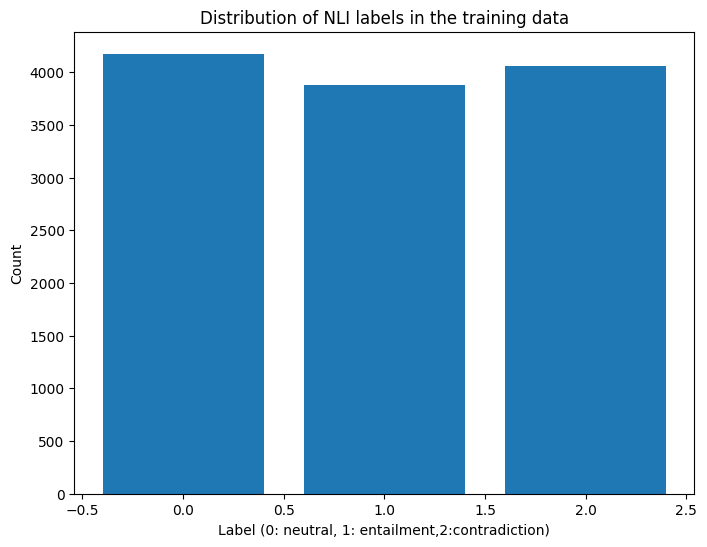

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(train_nlp['label'].value_counts().index, train_nlp['label'].value_counts().values)
plt.xlabel('Label (0: neutral, 1: entailment,2:contradiction)')
plt.ylabel('Count')
plt.title('Distribution of NLI labels in the training data')
plt.show()

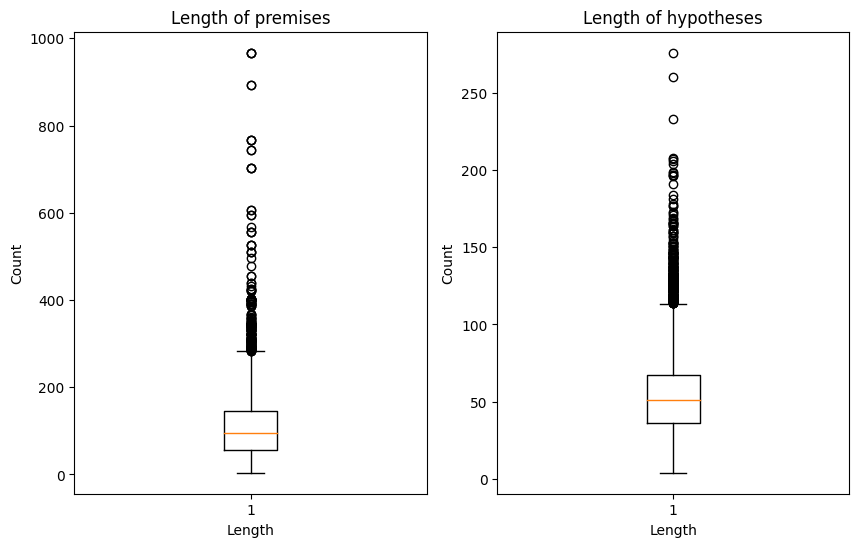

In [12]:
# Length of premises and hypotheses
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(train_nlp['premise'].str.len())
plt.title('Length of premises')
plt.xlabel('Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(train_nlp['hypothesis'].str.len())
plt.title('Length of hypotheses')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Distribution of languages in the training set')

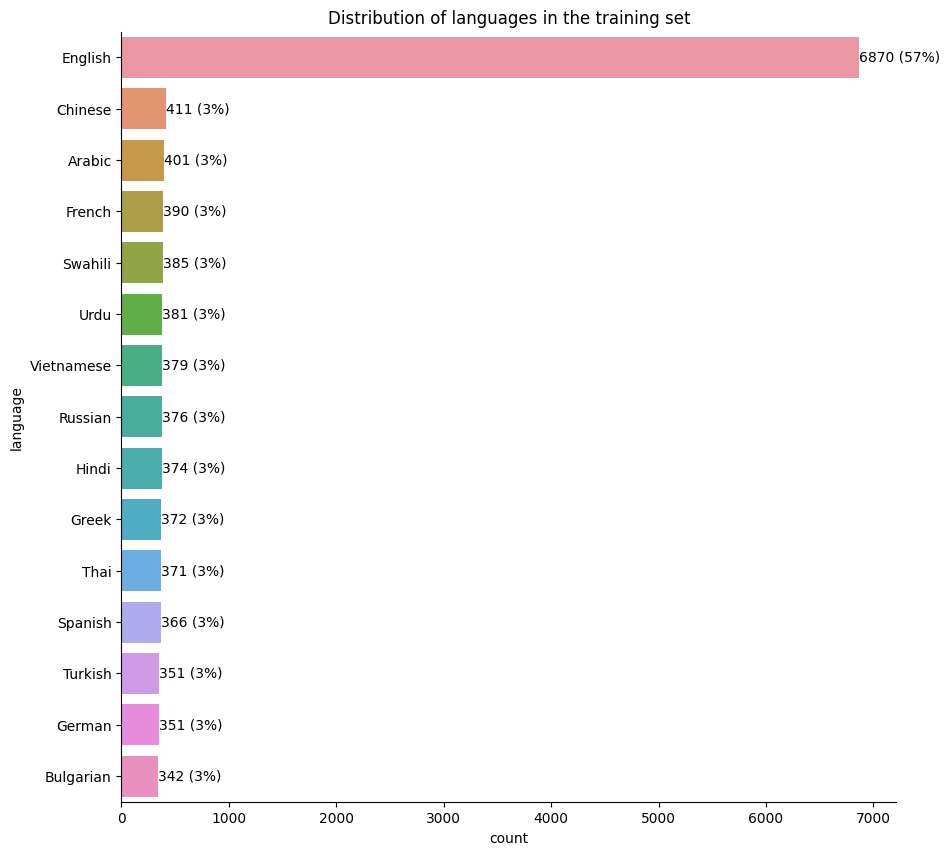

In [13]:

f, ax = plt.subplots(figsize=(10, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.despine()
ax = sns.countplot(data=train_nlp, 
                   y="language",
                   order = train_nlp['language'].value_counts().index)

abs_values = train_nlp['language'].value_counts(ascending=False)
rel_values = train_nlp['language'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

ax.set_title("Distribution of languages in the training set")

# Preprocess the data

In [14]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-z0-9 ]+', '', text)
    return text

# Apply cleaning to training data
train_nlp['premise'] = train_nlp['premise'].apply(clean_text)
train_nlp['hypothesis'] = train_nlp['hypothesis'].apply(clean_text)

# Apply cleaning to test data (assuming the structure is the same) 
test_nlp['premise'] = test_nlp['premise'].apply(clean_text)
test_nlp['hypothesis'] = test_nlp['hypothesis'].apply(clean_text)

In [15]:
!pip install tqdm

In [16]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.6 MB/s eta 0:00:00


In [17]:
!pip install --upgrade jupyter ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [18]:
!pip install transformers

In [19]:
! pip install -U git+https://github.com/huggingface/transformers.git
! pip install -U git+https://github.com/huggingface/accelerate.git
! pip install evaluate

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-_ah2z60_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-_ah2z60_
  Resolved https://github.com/huggingface/transformers.git to commit 89c64817ce4172bc8bb58c675c445a63f16d0e38
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - \ done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - \ done
  Created wheel for transformers: filename=transformers-4.39.0.dev0-py3-none-any.whl size=8552193 sha256=e55fb4c6e0fca950f79a04551f6cf538a9916ee9202dbfd1710dba685e8d11b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-qac414_a/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.0
    Uninstalling transformers-4.37.0:


In [20]:
from datasets import Dataset,DatasetDict
from transformers import AutoModelForSequenceClassification,AutoTokenizer, DataCollatorWithPadding
from transformers import TrainingArguments,Trainer
import evaluate
import torch
from torch import softmax

In [21]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name) #

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [22]:
train_nlp['premise_text_length'] = train_nlp['premise'].apply(len)  

In [23]:
train_nlp['hypothesis_text_length'] = train_nlp['hypothesis'].apply(len)

In [24]:
train_nlp = train_nlp.drop(labels =['language','lang_abv','premise_text_length','hypothesis_text_length'],axis =1)
test_nlp = test_nlp.drop(labels=['language','lang_abv'],axis=1)

In [25]:
from datasets import Dataset, DatasetDict

In [26]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_nlp, test_size=0.2, random_state=42)


train_ds = Dataset.from_pandas(train_df) 
val_ds = Dataset.from_pandas(val_df)     
test_ds = Dataset.from_pandas(test_nlp)      

ds = DatasetDict()
ds['train'] = train_ds                  
ds['validation'] = val_ds              
ds['test'] = test_ds    

In [27]:
def tokenizer_sentence(data):
    return tokenizer(data['premise'], data['hypothesis'], truncation=True)

In [28]:
tokenized_ds = ds.map(tokenizer_sentence, batched=True)

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

In [29]:
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['id', 'premise', 'hypothesis', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 9696
    })
    validation: Dataset({
        features: ['id', 'premise', 'hypothesis', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 2424
    })
    test: Dataset({
        features: ['id', 'premise', 'hypothesis', 'input_ids', 'attention_mask'],
        num_rows: 5195
    })
})

In [30]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [31]:
import torch.nn as nn
from transformers import XLMRobertaModel

class CustomXLMRobertaModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaModel, self).__init__()
        model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
        self.roberta = XLMRobertaModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_labels)
        )
        self.loss = nn.CrossEntropyLoss()
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        output = self.dropout(output.pooler_output)
        logits = self.classifier(output)

        if labels is not None:
            loss = self.loss(logits.view(-1, self.num_labels), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return logits

In [32]:
model = CustomXLMRobertaModel(num_labels=3) 

config.json:   0%|          | 0.00/921 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_metric

training_args = TrainingArguments("/content",
                                  optim="adamw_torch",
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
          'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

In [34]:
from transformers import Trainer

trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  
)

In [35]:
!pip install wandb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [36]:
import os
os.environ["WANDB_DISABLED"] = "false"  

In [37]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.752400,0.849050,0.596535,{'f1': 0.5965346534653465}
2,0.602600,0.866859,0.627475,{'f1': 0.6274752475247525}
3,0.649000,0.971605,0.628300,{'f1': 0.6283003300330033}
4,0.703800,1.133095,0.623350,{'f1': 0.6233498349834984}
5,0.433200,1.221884,0.634901,{'f1': 0.6349009900990099}


TrainOutput(global_step=6060, training_loss=0.6517199682717276, metrics={'train_runtime': 814.1186, 'train_samples_per_second': 59.549, 'train_steps_per_second': 7.444, 'total_flos': 0.0, 'train_loss': 0.6517199682717276, 'epoch': 5.0})

In [38]:
predictions = trainer.predict(tokenized_ds["test"])
predictions

PredictionOutput(predictions=array([[ 0.20895778,  0.14859344,  0.2278191 ],
       [ 0.20895778,  0.14859344,  0.2278191 ],
       [ 3.656072  , -2.3151367 , -2.3878984 ],
       ...,
       [ 0.20749782,  0.15052697,  0.22783814],
       [ 3.6797705 , -2.3469396 , -2.3533661 ],
       [-2.1269689 , -1.6257296 ,  4.432257  ]], dtype=float32), label_ids=None, metrics={'test_runtime': 14.25, 'test_samples_per_second': 364.562, 'test_steps_per_second': 45.614})

In [39]:
logits = torch.from_numpy(predictions.predictions)
probs = torch.softmax(logits, -1).tolist() # convert to probability
probs[:5]

[[0.33778512477874756, 0.3179982006549835, 0.3442166745662689],
 [0.33778512477874756, 0.3179982006549835, 0.3442166745662689],
 [0.9951007962226868, 0.002538657747209072, 0.002360501093789935],
 [0.3847551941871643, 0.29238343238830566, 0.32286137342453003],
 [0.33778512477874756, 0.3179982006549835, 0.3442166745662689]]

In [40]:
outputs = []

for index, prob in enumerate(probs):

    predicted_label = prob.index(max(prob))
    element_id = ds['test']['id'][index]
    prediction = (element_id, predicted_label)
    outputs.append(prediction)

In [41]:
submission = pd.read_csv("/kaggle/input/contradictory-my-dear-watson/sample_submission.csv")
submission

,id,prediction
0,c6d58c3f69,1
1,cefcc82292,1
2,e98005252c,1
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,1
5193,0407b48afb,1


In [42]:
outputs = pd.DataFrame(outputs)
outputs

,0,1
0,c6d58c3f69,2
1,cefcc82292,2
2,e98005252c,0
3,58518c10ba,0
4,c32b0d16df,2
...,...,...
5190,5f90dd59b0,2
5191,f357a04e86,1
5192,1f0ea92118,2
5193,0407b48afb,0


In [43]:
import matplotlib.pyplot as plotter
import plotly.graph_objects as go
 
import plotly.express as px 

In [44]:
labels, frequencies = np.unique(outputs[1].values, return_counts = True)

fig = px.pie(values=frequencies, 
             names=labels, 
             title='train : label distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

In [45]:
submission['prediction']=outputs[1]
submission.to_csv("submission.csv", index=False)
submission

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,2
2,e98005252c,0
3,58518c10ba,0
4,c32b0d16df,2
...,...,...
5190,5f90dd59b0,2
5191,f357a04e86,1
5192,1f0ea92118,2
5193,0407b48afb,0
